# Task 2

---

## Predictive modeling of customer bookings

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

And the encoding parameter is set to "ISO-8859-1", which is an encoding standard for representing characters in Latin alphabet-based writing systems. This encoding is also known as Latin-1 and supports a wide range of characters used in Western European languages such as English, French, German, Spanish, and Italian.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [29]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [30]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

Change the day into number to make it easier to read

In [31]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [32]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [33]:
data = df[['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage','booking_complete']]
data.head()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,booking_complete
0,262,19,7,1,0
1,112,20,3,0,0
2,243,22,17,1,0
3,96,31,4,0,0
4,68,22,15,1,0


In [34]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [35]:
x = data.loc[:, data.columns != 'booking_complete']
y = data['booking_complete']

This code is used to split a dataset into predictor variables (X) and target variable (y) in a supervised learning problem. 

So, the first line of the code X = data.loc[:, data.columns != 'booking_complete'] creates a new variable called X that contains all the columns in the dataset except for the column called 'booking_complete'. We use the loc method to select all rows (represented by :) and all columns except the one we want to exclude.

The second line of the code y = data['booking_complete'] creates a new variable called y that contains only the column called 'booking_complete'. This variable will be used as the target variable for our prediction.

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   purchase_lead        50000 non-null  int64
 1   length_of_stay       50000 non-null  int64
 2   flight_hour          50000 non-null  int64
 3   wants_extra_baggage  50000 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [37]:
categorical_cols = x.select_dtypes(include=['object']).columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

This code is used to convert categorical variables in a dataset into numerical values that a machine learning model can understand. This is done using a technique called one-hot encoding, which creates a new column for each possible category in the original column.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 42)

This code is used to split a dataset into training and testing sets for use in a machine learning model.

- X: The features or inputs to the model
- y: The target or output of the model
- test_size: The proportion of the data to be used as the testing set (in this case, 20%)
- stratify: An optional parameter that ensures that the proportion of samples in each class is roughly the same in the training and testing sets. This is important for maintaining the balance between classes in the original dataset.
- random_state: An optional parameter that sets the random seed for reproducibility. This ensures that the same random samples are chosen every time the code is run.

In [40]:
x_train.shape, x_test.shape

((40000, 4), (10000, 4))

This code is used to print the dimensions (i.e., number of rows and columns) of the training and testing sets after they have been split using train_test_split.

X_train.shape returns a tuple of the form (number of rows, number of columns) for the X_train dataset, and X_test.shape returns the same tuple for the X_test dataset.

This code is useful for quickly checking that the data has been split correctly and that the dimensions of the training and testing sets are as expected.

In [41]:
y_train.value_counts()

0    34018
1     5982
Name: booking_complete, dtype: int64

This code is used to count the number of occurrences of each unique value in the y_train column.

In [42]:
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

This code is used to train a random forest classifier using the RandomForestClassifier() function from scikit-learn.
The resulting forest object can then be used to make predictions on new data using the predict() method.

In [44]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.053 seconds


**Visualisation**

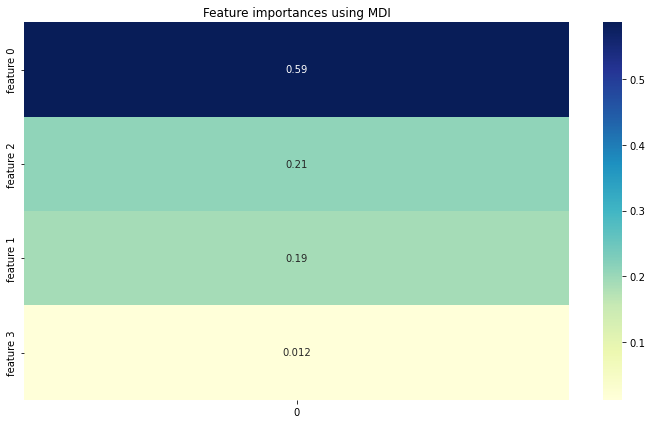

In [45]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(forest_importances.to_frame(), cmap="YlGnBu", annot=True, ax=ax)
ax.set_title("Feature importances using MDI")
plt.tight_layout()

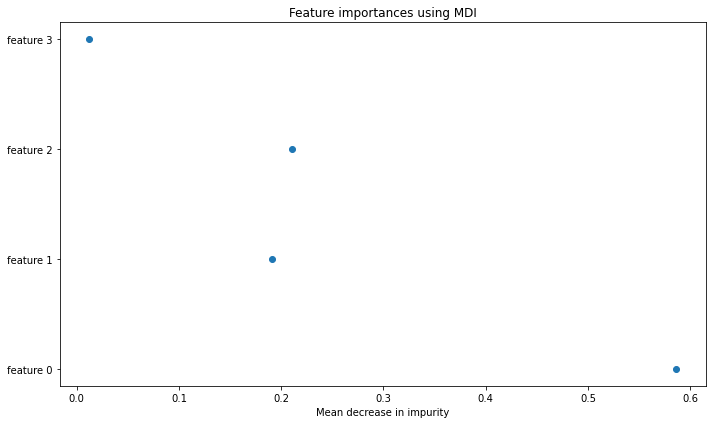

In [47]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=forest_importances, y=forest_importances.index)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.tight_layout()

In [48]:
x_train.head(2)

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage
11179,168,38,8,0
26739,54,3,1,0


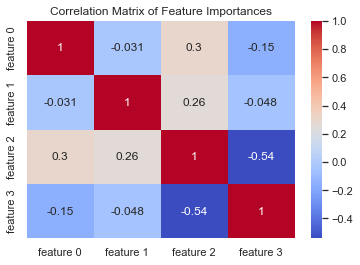

In [52]:
# create a dataframe with the feature importances
importances_df = pd.DataFrame(result.importances.T, columns=feature_names)

# create a correlation matrix between the features
corr = importances_df.corr()

# plot the correlation matrix as a heatmap
sns.set(style="white")
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix of Feature Importances")
plt.show()

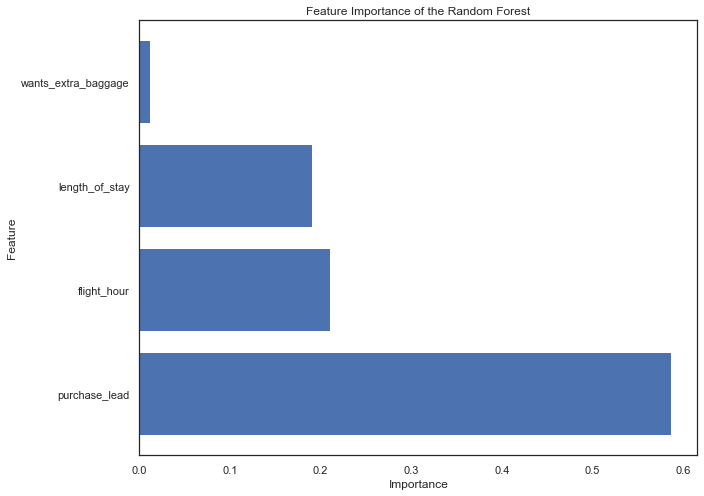

In [58]:
importances = forest.feature_importances_

# Get feature names
feature_names = x_test.columns

# Create a dataframe with feature importances and feature names
feature_importance = pd.DataFrame(list(zip(feature_names, importances)), columns=["Feature", "Importance"])

# Sort the dataframe by feature importances
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10,8))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of the Random Forest")
plt.show()

In [60]:
y_pred = forest.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## with 4 features ['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage'],

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8504
           1       0.26      0.13      0.18      1496

    accuracy                           0.81     10000
   macro avg       0.56      0.53      0.54     10000
weighted avg       0.77      0.81      0.79     10000



The code is evaluating the performance of a random forest classifier model on a test set using the classification report metric.

y_pred = forest.predict(X_test) line predicts the target variable for the test set using the trained random forest model forest.

classification_report(y_test, y_pred) generates a report that shows precision, recall, f1-score, and support for each class in the target variable y_test. This report helps to evaluate how well the model is performing on the test set.

The line "with 4 features ['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage']" suggests that the classification report is generated for a model trained on four specific features, which are 'purchase_lead', 'length_of_stay', 'flight_hour', and 'wants_extra_baggage'. These features were likely selected based on some prior analysis or domain knowledge.